In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### 1. Load the data in the (yellow highlighted) Data Folder in the file auto-mpg.data into a pandas DataFrame
### 2. Review the data and the provided data set description.

In [2]:
df = pd.read_fwf('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', header=None)
df.head(10)

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


### 3. Use the attribute information provided in auto-mpg.names to name your pandas DataFrame columns.

In [3]:
column_name = ['mpg',
          'cylinders',
          'displacement',
          'horsepower',
          'weight',
          'acceleration',
          'model_yr',
          'origin',
          'car_name']
df.columns = column_name
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
5,15.0,8,429.0,198.0,4341.0,10.0,70,1,"""ford galaxie 500"""
6,14.0,8,454.0,220.0,4354.0,9.0,70,1,"""chevrolet impala"""
7,14.0,8,440.0,215.0,4312.0,8.5,70,1,"""plymouth fury iii"""
8,14.0,8,455.0,225.0,4425.0,10.0,70,1,"""pontiac catalina"""
9,15.0,8,390.0,190.0,3850.0,8.5,70,1,"""amc ambassador dpl"""


### 4. Some of the horsepower data is marked as missing with a ‘?’. You need to replace this ‘?’ with a pandas-appropriate missing value, then convert the column to numeric.

In [4]:
df.horsepower = df.horsepower.replace('?', np.nan)
df.horsepower = pd.to_numeric(df.horsepower)
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_yr          int64
origin            int64
car_name         object
dtype: object

### 5. The origin column values are 1, 2, and 3. Convert these values respectively to ‘USA’, ‘Asia’, and ‘Europe’

In [5]:
origins = {1: 'USA', 
          2: 'Asia',
          3: 'Europe'}

df.origin = df.origin.map(origins)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_yr,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA,"""ford torino"""


### 6. Create a bar chart that shows the distribution for cylinders.

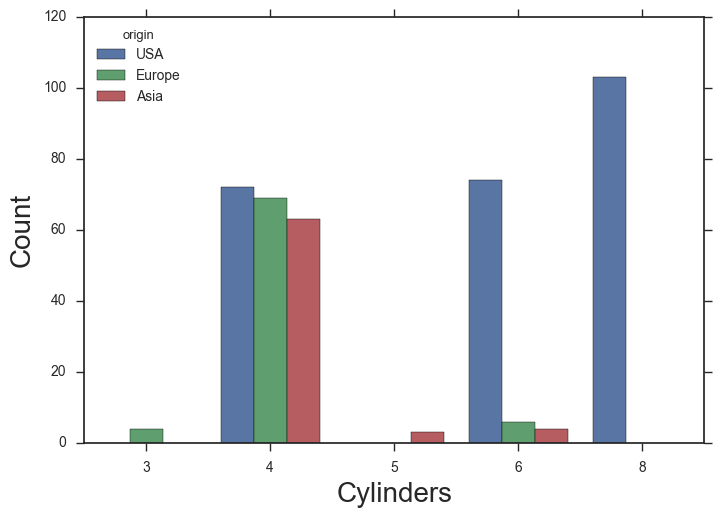

In [66]:
a = sns.countplot(x="cylinders", hue='origin' ,data=df)
plt.xlabel("Cylinders",size = 20)
plt.ylabel("Count",size = 20)

### 7. Create a scatterplot that shows the relationship between horsepower and weight.

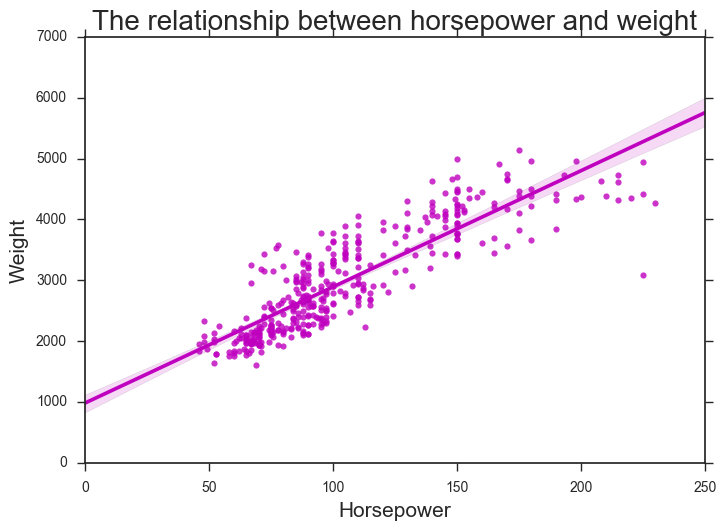

In [63]:
b = sns.regplot(x="horsepower", y="weight", data=df, color='m')
plt.title('The relationship between horsepower and weight', fontsize=20)
plt.xlabel("Horsepower",size = 15)
plt.ylabel("Weight",size = 15)

### 8. Ask, then answer (using matplotlib and seaborn graphics capabilities) an interesting question about the distribution of one of the variables, or the relationship between two (or more!) of the variables in the “Auto MPG” dataset.

### Question: Does MPG change over time? And does the country of origin make a difference?

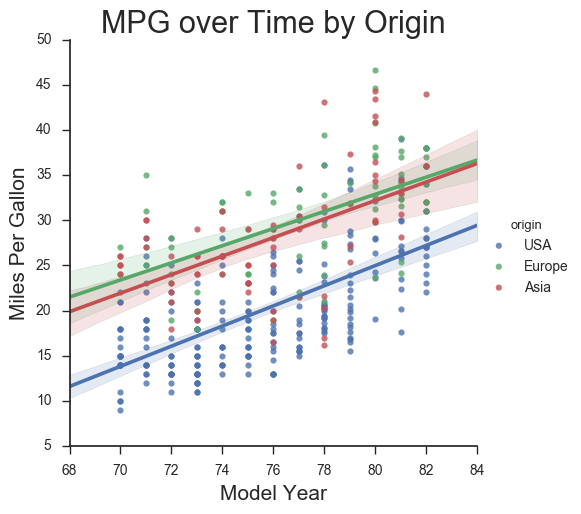

In [64]:
c = sns.lmplot(x='model_yr', y='mpg', hue='origin', data=df)
plt.title('MPG over Time by Origin', fontsize=22)
plt.xlabel('Model Year', fontsize=15)
plt.ylabel('Miles Per Gallon', fontsize=15)